In [7]:
#importing all the dependancies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nibabel as nib 
import os
import glob
import nilearn
from nilearn import plotting
from nilearn import image
import networkx as nx

In [137]:
#get the file path of the fmri images
path1 = "/Volumes/Subha Work/Neuroventure/residuals/V1"
path2 = "/Volumes/Subha Work/Neuroventure/residuals/V2/residuals_v2"
path3 = "/Volumes/Subha Work/Neuroventure/residuals/V3/residuals/residuals"
filesV1 = glob.glob(os.path.join(path1, '*.nii'))
filesV2 = glob.glob(os.path.join(path2, '*.nii'))
filesV3 = glob.glob(os.path.join(path3, '*.nii'))


participants_subset1 = filesV1[:20]
participants_subset2 = filesV2[:20]
participants_subset3= filesV3[:20]



In [47]:
import nibabel as nib

# Read files in V1 folder
imagesV1 = []
for filepath in filesV1:
    img = nib.load(filepath)
    imagesV1.append(img)
    #print(img.shape)

# Read files in V2 folder
imagesV2 = []
for filepath in filesV2:
    img = nib.load(filepath)
    imagesV2.append(img)
    #print(img.shape)

# Read files in V3 folder
imagesV3 = []
for filepath in filesV3:
    img = nib.load(filepath)
    imagesV3.append(img)
    #print(img.shape)

Note: you may need to restart the kernel to use updated packages.


In [54]:
from nilearn.input_data import NiftiMasker
from tqdm import tqdm
# Create the NiftiMasker object
masker = NiftiMasker()
participants_subset = filesV1[:20]
# Process files in V1 folder
masked_data_v1 = []
for filepath in tqdm(participants_subset1):
    img = nib.load(filepath)
    masked_data = masker.fit_transform(img, confounds=None)
    masked_data_v1.append(masked_data)

100%|██████████| 20/20 [03:09<00:00,  9.48s/it]


In [55]:
#masking the data in V2 folder
from nilearn.input_data import NiftiMasker
from tqdm import tqdm
masker = NiftiMasker()
participants_subset = filesV2[:20]
masked_data_v2 = []
for filepath in tqdm(participants_subset2):
    img = nib.load(filepath)
    masked_data = masker.fit_transform(img, confounds=None)
    masked_data_v2.append(masked_data)

100%|██████████| 20/20 [02:08<00:00,  6.41s/it]


In [56]:
#masking data in V3 folder
from nilearn.input_data import NiftiMasker
from tqdm import tqdm
masker = NiftiMasker()
participants_subset = filesV3[:20]
masked_data_v3 = []
for filepath in tqdm(participants_subset3):
    img = nib.load(filepath)
    masked_data = masker.fit_transform(img, confounds=None)
    masked_data_v3.append(masked_data)

100%|██████████| 20/20 [03:43<00:00, 11.16s/it]


In [57]:
from nilearn.input_data import NiftiMasker
import matplotlib.pyplot as plt
import nibabel as nib
from tqdm import tqdm

# Create the NiftiMasker object and process files in V1 folder
masker = NiftiMasker()
thresholded_imgs_v1 = []
for filepath in tqdm(participants_subset1):
    img = nib.load(filepath)
    masked_data = masker.fit_transform(img, confounds=None)
    thresholded_masked_data = masked_data * (masked_data > masked_data.mean())
    thresholded_img = masker.inverse_transform(thresholded_masked_data)
    thresholded_imgs_v1.append(thresholded_img)



100%|██████████| 20/20 [03:25<00:00, 10.26s/it]


In [58]:
#processing files in V2 folder
from nilearn.input_data import NiftiMasker
import matplotlib.pyplot as plt
import nibabel as nib
from tqdm import tqdm

masker = NiftiMasker()

# Process files in V2 folder
thresholded_imgs_v2 = []
for filepath in tqdm(participants_subset2):
    img = nib.load(filepath)
    masked_data = masker.fit_transform(img, confounds=None)
    thresholded_masked_data = masked_data * (masked_data > masked_data.mean())
    thresholded_img = masker.inverse_transform(thresholded_masked_data)
    thresholded_imgs_v2.append(thresholded_img)


100%|██████████| 20/20 [02:22<00:00,  7.10s/it]


In [59]:
#processing files in V3 folder
from nilearn.input_data import NiftiMasker
import matplotlib.pyplot as plt
import nibabel as nib
from tqdm import tqdm

masker = NiftiMasker()
#process files in V3 folder
thresholded_imgs_v3 = []
for filepath in tqdm(participants_subset3):
    img = nib.load(filepath)
    masked_data = masker.fit_transform(img, confounds=None)
    thresholded_masked_data = masked_data * (masked_data > masked_data.mean())
    thresholded_img = masker.inverse_transform(thresholded_masked_data)
    thresholded_imgs_v3.append(thresholded_img)

100%|██████████| 20/20 [03:55<00:00, 11.77s/it]


In [33]:
#atlas loading and processing
from nilearn import datasets
from nilearn import plotting
from nilearn.input_data import NiftiLabelsMasker
from nilearn.connectome import ConnectivityMeasure
from nilearn import plotting

# Fetching atlas
atlas = datasets.fetch_coords_seitzman_2018()
roi_coordinates = atlas['rois']
network_names = atlas['networks']
region_names = atlas['regions']
reward_network_name = "reward"

reward_network_indices = np.where(network_names == reward_network_name)[0]

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/nilearn/datasets/atlas.py:1621: UserWarning: `legacy_format` will default to `False` in release 0.11. Dataset fetchers will then return pandas dataframes by default instead of recarrays.
  warnings.warn(_LEGACY_FORMAT_MSG)


In [34]:
#creating NiftiSphereMasker object
import nilearn
from nilearn import maskers
from nilearn.input_data import NiftiSpheresMasker
nilearn.maskers.NiftiSpheresMasker
# Define the coordinates and radius of each ROI
rois = [
    {
        'coordinates': (-30.63, 18.71, -18.98),
        'radius': 5
        #left lateral orbitofrontal cortex
    },
    {
        'coordinates': (-21.14, 40.87, -20.48),
        'radius': 5
        #left medial orbitofrontal cortex
        
    },
    {
        'coordinates': (23.96, 31.94, -17.78),
        'radius': 5
        #right medial orbitofrontal cortex
    },
    {
        'coordinates': (27.06, 16.22, -16.93),
        'radius': 5
        #right insula
    },
    {
        'coordinates': (-20.3, -2.27, -22.21),
        'radius': 5
        # left amgydala
    },
    {
        'coordinates': (19.51, -1.85, -23.11),
        'radius': 4
        #right amygdala
    },
    {
        'coordinates': (12.66, 17.32, -5.06),
        'radius': 4
        #right striatum
    },
    {
        'coordinates': (-12.49, 17.05, -4.49),
        'radius': 4
        #left striatum
    },
    
]
seeds = [roi['coordinates'] for roi in rois]

# Create the NiftiSpheresMasker object
atlas_masker = NiftiSpheresMasker(seeds= seeds, radius=4)

In [60]:
atlas_masker = NiftiSpheresMasker(seeds= seeds, radius=4)

print(img.shape)
masked_data_v1 = []
for filepath in tqdm(participants_subset1):
    img = nib.load(filepath)
    masked_data = atlas_masker.fit_transform(img, confounds=None)
    masked_data_v1.append(masked_data)

(91, 109, 91, 152)


100%|██████████| 20/20 [03:41<00:00, 11.07s/it]


In [61]:
atlas_masker = NiftiSpheresMasker(seeds= seeds, radius=4)

masked_data_v2 = []
for filepath in tqdm(participants_subset2):
    img = nib.load(filepath)
    masked_data = atlas_masker.fit_transform(img, confounds=None)
    masked_data_v2.append(masked_data)

100%|██████████| 20/20 [02:34<00:00,  7.74s/it]


In [62]:
atlas_masker = NiftiSpheresMasker(seeds= seeds, radius=4)

masked_data_v3 = []
for filepath in tqdm(participants_subset3):
    img = nib.load(filepath)
    masked_data = atlas_masker.fit_transform(img, confounds=None)
    masked_data_v3.append(masked_data)

100%|██████████| 20/20 [04:12<00:00, 12.61s/it]


In [158]:
# Create the ConnectivityMeasure object with the desired kind of correlation
from nilearn.connectome import ConnectivityMeasure

region_labels =  ['left lateral orbitofrontal cortex', 'left medial orbitofrontal cortex', 'right medial orbitofrontal cortex', 'right insula', 'left amgydala', 'right amygdala', 'right striatum', 'left striatum']
# Create the ConnectivityMeasure object with the desired kind of correlation
correlation_measure = ConnectivityMeasure(kind='correlation')
# Compute the functional connectivity
correlation_matrix1 = correlation_measure.fit_transform(masked_data_v1)
# Compute the average correlation matrix across all participants
average_correlation_matrix1 = np.mean(correlation_matrix1, axis=0)
# Compute the functional connectivity
correlation_matrix2 = correlation_measure.fit_transform(masked_data_v2)
# Compute the average correlation matrix across all participants
average_correlation_matrix2 = np.mean(correlation_matrix2, axis=0)
# Compute the functional connectivity
correlation_matrix3 = correlation_measure.fit_transform(masked_data_v3)
# Compute the average correlation matrix across all participants
average_correlation_matrix3 = np.mean(correlation_matrix3, axis=0)



/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/nilearn/connectome/connectivity_matrices.py:495: FutureWarning:

The default strategy for standardize is currently 'zscore' which incorrectly uses population std to calculate sample zscores. The new strategy 'zscore_sample' corrects this behavior by using the sample std. In release 0.13, the default strategy will be replaced by the new strategy and the 'zscore' option will be removed. Please use 'zscore_sample' instead.

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/nilearn/connectome/connectivity_matrices.py:495: FutureWarning:

The default strategy for standardize is currently 'zscore' which incorrectly uses population std to calculate sample zscores. The new strategy 'zscore_sample' corrects this behavior by using the sample std. In release 0.13, the default strategy will be replaced by the new strategy and the 'zscore' option will be removed. Please use 'zscore_sample' 

In [143]:
import plotly.subplots as sp
import plotly.graph_objects as go

# Define the time points
time_points = ['Time Point 1', 'Time Point 2', 'Time Point 3']

# Create subplots
fig = sp.make_subplots(rows=1, cols=3, subplot_titles=time_points)
np.fill_diagonal(average_correlation_matrix1, 0)
np.fill_diagonal(average_correlation_matrix2, 0)
np.fill_diagonal(average_correlation_matrix3, 0)
# Add heatmap traces for each time point
trace1 = go.Heatmap(
    z=average_correlation_matrix1,
    x=region_labels,
    y=region_labels,
    colorscale='RdBu_r',
    zmin=-0.8,
    zmax=0.8,
    colorbar=dict(title='Correlation')
)

trace2 = go.Heatmap(
    z=average_correlation_matrix2,
    x=region_labels,
    y=[],
    colorscale='RdBu_r',
    zmin=-0.8,
    zmax=0.8,
    colorbar=dict(title='Correlation'),
    showscale=False
)

trace3 = go.Heatmap(
    z=average_correlation_matrix3,
    x=region_labels,
    y=[],
    colorscale='RdBu_r',
    zmin=-0.8,
    zmax=0.8,
    colorbar=dict(title='Correlation'),
    showscale=False
)

# Add traces to subplots
fig.add_trace(trace1, row=1, col=1)
fig.add_trace(trace2, row=1, col=2)
fig.add_trace(trace3, row=1, col=3)

# Update layout
fig.update_layout(
    title="Resting state reward network connectivity",
    xaxis=dict(title='Regions'),
    yaxis=dict(title='Regions'),
    height=500,
    width=1200,
    showlegend=False
)

# Show the plot
fig.show()


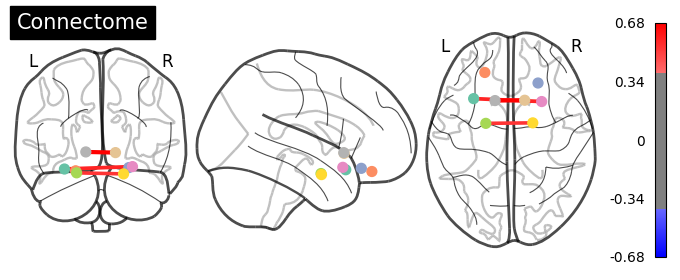

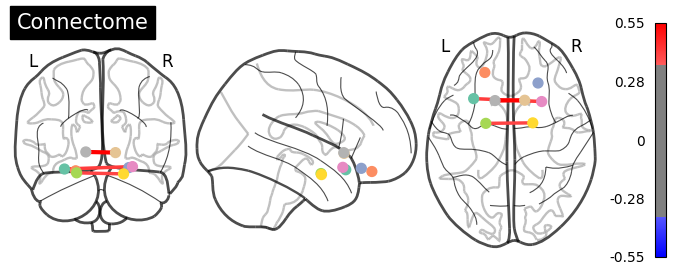

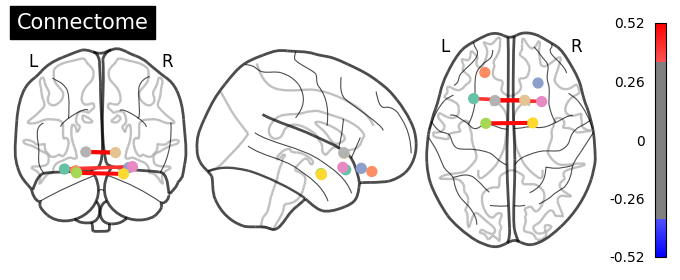

In [91]:
from nilearn.plotting import plot_connectome

# Plot the connectome
plotting.plot_connectome(average_correlation_matrix1, seeds, title='Connectome',edge_threshold="90%", colorbar=True)
plotting.plot_connectome(average_correlation_matrix2, seeds, title='Connectome',edge_threshold="90%", colorbar=True)
plotting.plot_connectome(average_correlation_matrix3, seeds, title='Connectome',edge_threshold="90%", colorbar=True)


In [171]:
import numpy as np
from scipy.stats import ttest_ind
epsilon = 1e-10
average_correlation_matrix1 += epsilon
average_correlation_matrix2 += epsilon
average_correlation_matrix3 += epsilon

#flatten the average correlation matrix
corr_coef1 = np.ravel(average_correlation_matrix1)
corr_coef2 = np.ravel(average_correlation_matrix2)
corr_coef3 = np.ravel(average_correlation_matrix3)


# Perform t-test
t_statistic1, p_value1 = ttest_ind(corr_coef1, corr_coef2)
t_statistic2, p_value2 = ttest_ind(corr_coef1, corr_coef3)
t_statistic3, p_value3 = ttest_ind(corr_coef2, corr_coef3)

#print the p values
print(p_value1)
print(p_value2)
print(p_value3)


0.20214417156708017
0.7489632606673926
0.3206681890020016


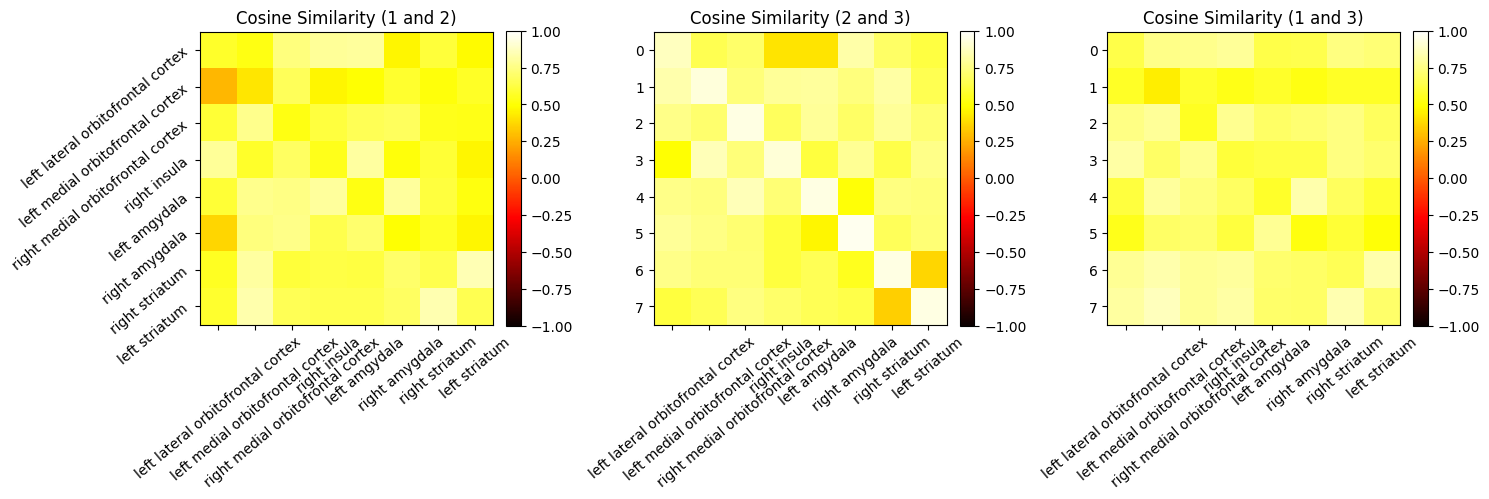

In [124]:
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity

# Compute cosine similarity matrices
similarity_1_2 = cosine_similarity(average_correlation_matrix1, average_correlation_matrix2)
similarity_2_3 = cosine_similarity(average_correlation_matrix2, average_correlation_matrix3)
similarity_1_3 = cosine_similarity(average_correlation_matrix1, average_correlation_matrix3)

# Plotting
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plot similarity matrix 1 and 2
im1 = axes[0].imshow(similarity_1_2, cmap='hot', vmin=-1, vmax=1)
axes[0].set_title('Cosine Similarity (1 and 2)')
axes[0].set_xticks(range(len(region_labels)))
axes[0].set_xticklabels(region_labels, rotation=40)
axes[0].set_yticks(range(len(region_labels)))
axes[0].set_yticklabels(region_labels, rotation=40)
fig.colorbar(im1, ax=axes[0], fraction=0.046, pad=0.04)

# Plot similarity matrix 2 and 3
im2 = axes[1].imshow(similarity_2_3, cmap='hot', vmin=-1, vmax=1)
axes[1].set_title('Cosine Similarity (2 and 3)')
axes[1].set_xticks(range(len(region_labels)))
axes[1].set_xticklabels(region_labels, rotation=40)
fig.colorbar(im2, ax=axes[1], fraction=0.046, pad=0.04)

# Plot similarity matrix 1 and 3
im3 = axes[2].imshow(similarity_1_3, cmap='hot', vmin=-1, vmax=1)
axes[2].set_title('Cosine Similarity (1 and 3)')
axes[2].set_xticks(range(len(region_labels)))
axes[2].set_xticklabels(region_labels, rotation=40)
fig.colorbar(im3, ax=axes[2], fraction=0.046, pad=0.04)

plt.tight_layout()
plt.show()




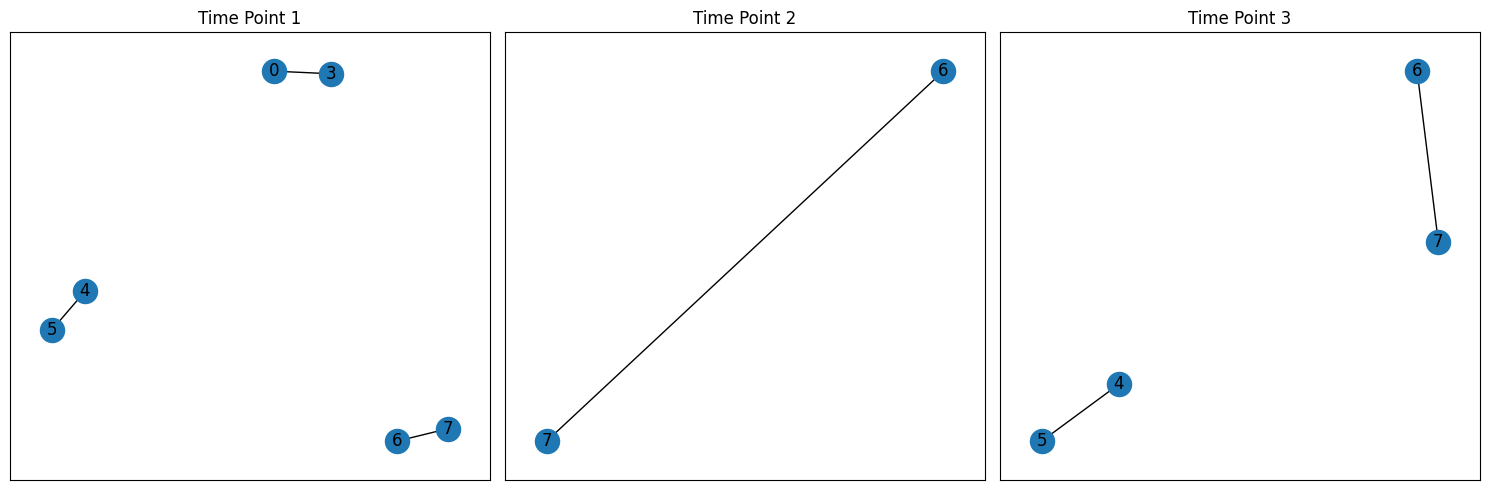

In [156]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# Correlation matrices for three time points
correlation_matrix1 = average_correlation_matrix1
correlation_matrix2 = average_correlation_matrix2
correlation_matrix3 = average_correlation_matrix3

# Set a threshold value for edge creation
threshold = 0.5

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Iterate over the time points
for i, correlation_matrix in enumerate([correlation_matrix1, correlation_matrix2, correlation_matrix3]):
    # Create a graph
    graph = nx.Graph()

    # Iterate over the elements of the correlation matrix
    for j in range(correlation_matrix.shape[0]):
        for k in range(j+1, correlation_matrix.shape[1]):
            correlation = correlation_matrix[j, k]
            if correlation >= threshold:
                graph.add_edge(j, k, weight=correlation)

    # Plot the graph in the corresponding subplot
    ax = axes[i]
    pos = nx.spring_layout(graph)
    nx.draw_networkx(graph, pos, with_labels=True, ax=ax)
    ax.set_title('Time Point {}'.format(i+1))

# Adjust the spacing between subplots
plt.tight_layout()
plt.show()


In [168]:
import numpy as np
import networkx as nx

# Correlation matrices for three time points
correlation_matrix1 = average_correlation_matrix1
correlation_matrix2 = average_correlation_matrix2
correlation_matrix3 = average_correlation_matrix3

# Compute shortest path length for each correlation matrix
shortest_path_lengths = []


for correlation_matrix in [correlation_matrix1, correlation_matrix2, correlation_matrix3]:
    # Create a graph
    graph = nx.from_numpy_array(correlation_matrix)

    # Compute shortest path length
    shortest_paths = dict(nx.all_pairs_shortest_path_length(graph))
    shortest_path_lengths.append(shortest_paths)

# Compare shortest path lengths
for i in range(len(shortest_path_lengths)-1):
    for node in shortest_path_lengths[i]:
        if shortest_path_lengths[i][node] != shortest_path_lengths[i+1][node]:
            print(f"Difference found in shortest path length for node {node}:")
            print(f"Time Point {i+1}: {shortest_path_lengths[i][node]}")
            print(f"Time Point {i+2}: {shortest_path_lengths[i+1][node]}")
            print() 

print("Finished comparing shortest path lengths")

Finished comparing shortest path lengths


In [ ]:
This shows that the network structure in terms of shortest path lengths remains stable across time points.